<a href="https://colab.research.google.com/github/Priyankapawar1224/Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv("/content/HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load Data (Assuming HR-Employee-Attrition.csv is the current dataset)
df = pd.read_csv('HR-Employee-Attrition.csv')

# 2. Initialize LabelEncoder
le = LabelEncoder()

# 3. Apply Label Encoding to all 'object' type columns
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [45]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [55]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=101)

optimal_ccp_alpha = 0.0020  # Optimal alpha found in previous analysis
clf_pruned = DecisionTreeClassifier(random_state=101, ccp_alpha=optimal_ccp_alpha)
clf_pruned.fit(X_train, y_train)

pred_train = clf_pruned.predict(X_train)
acc_train = accuracy_score(y_train, pred_train) * 100
report_train = classification_report(y_train, pred_train)
conf_train = confusion_matrix(y_train, pred_train)

pred_test = clf_pruned.predict(X_test)
acc_test = accuracy_score(y_test, pred_test) * 100
report_test = classification_report(y_test, pred_test)
conf_test = confusion_matrix(y_test, pred_test)

print(f"MODEL PERFORMANCE (Pruned with alpha={optimal_ccp_alpha})")

print("\n### A. TRAINING DATASET EVALUATION ###")
print(f"Accuracy on Training Data: {acc_train:.2f}%")
print("\nClassification Report (Training):\n", report_train)
print("Confusion Matrix (Training):\n", conf_train)

print("\n-----------------------------------------")

print("B. TESTING DATASET EVALUATION")
print(f"Accuracy on Testing Data: {acc_test:.2f}%")
print("\nClassification Report (Testing):\n", report_test)
print("Confusion Matrix (Testing):\n", conf_test)

MODEL PERFORMANCE (Pruned with alpha=0.002)

### A. TRAINING DATASET EVALUATION ###
Accuracy on Training Data: 90.18%

Classification Report (Training):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       862
           1       0.84      0.49      0.62       167

    accuracy                           0.90      1029
   macro avg       0.88      0.73      0.78      1029
weighted avg       0.90      0.90      0.89      1029

Confusion Matrix (Training):
 [[847  15]
 [ 86  81]]

-----------------------------------------
B. TESTING DATASET EVALUATION
Accuracy on Testing Data: 84.58%

Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       371
           1       0.53      0.30      0.38        70

    accuracy                           0.85       441
   macro avg       0.70      0.62      0.65       441
weighted avg       0.82      0.85      0.83       441

In [14]:
y_pred_test = model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_test


0.7653061224489796

In [15]:
y_pred_train = model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
acc_train


1.0

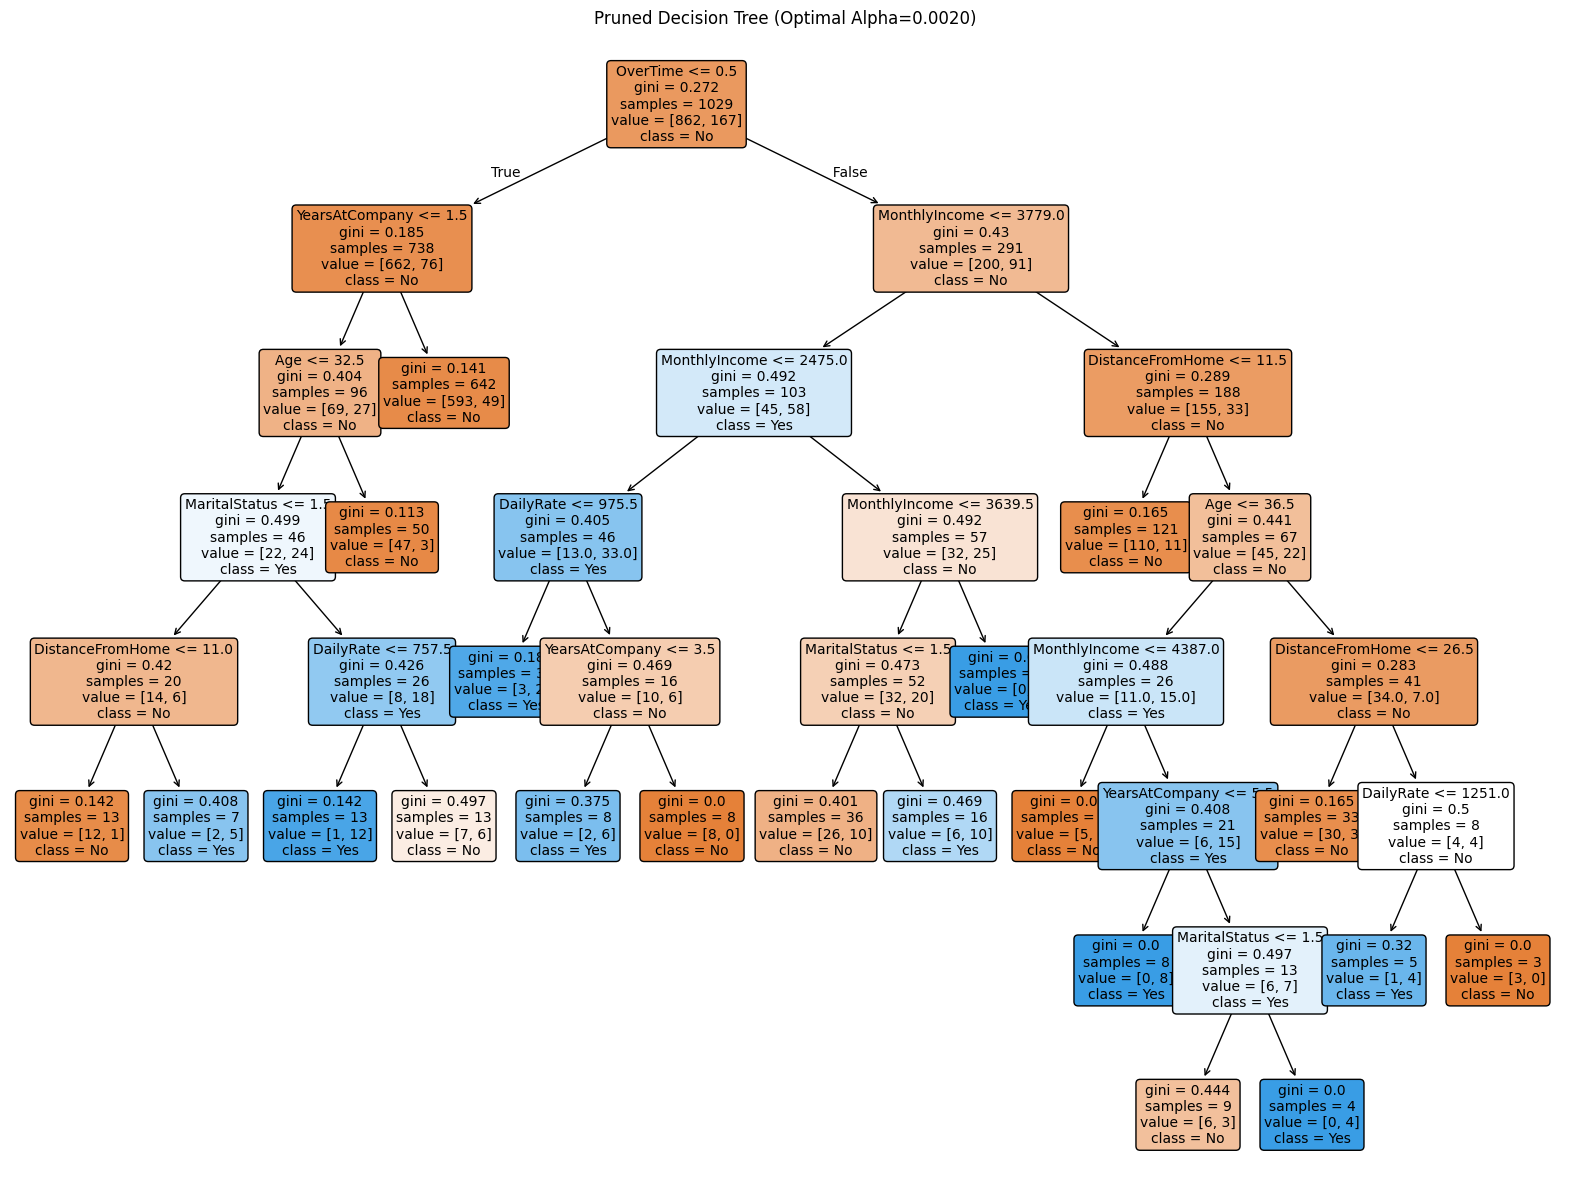

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv('HR-Employee-Attrition.csv')
y = df['Attrition']
X = df[['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'Gender', 'MaritalStatus', 'OverTime', 'JobLevel']].copy()

# Encoding
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)
X.loc[:, 'Gender'] = LabelEncoder().fit_transform(X['Gender'])
X.loc[:, 'MaritalStatus'] = LabelEncoder().fit_transform(X['MaritalStatus'])
X.loc[:, 'OverTime'] = LabelEncoder().fit_transform(X['OverTime'])

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=101)

# --- 2. Training the Final (Pruned) Model ---
# Using the optimal alpha found previously for HR-Attrition data (0.0020)
optimal_ccp_alpha = 0.0020
clf_pruned = DecisionTreeClassifier(random_state=101, ccp_alpha=optimal_ccp_alpha)
clf_pruned.fit(X_train, y_train)

# --- 3. Visualizing the Pruned Decision Tree ---
plt.figure(figsize=(20, 15))
plot_tree(clf_pruned,
               feature_names=X.columns.tolist(),
               class_names=['No', 'Yes'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title(f"Pruned Decision Tree (Optimal Alpha={optimal_ccp_alpha:.4f})")
plt.savefig('pruned_decision_tree_final.png')
plt.show()

In [56]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_prob)
fpr, tpr


(array([0.        , 0.14016173, 1.        ]),
 array([0.        , 0.28571429, 1.        ]))

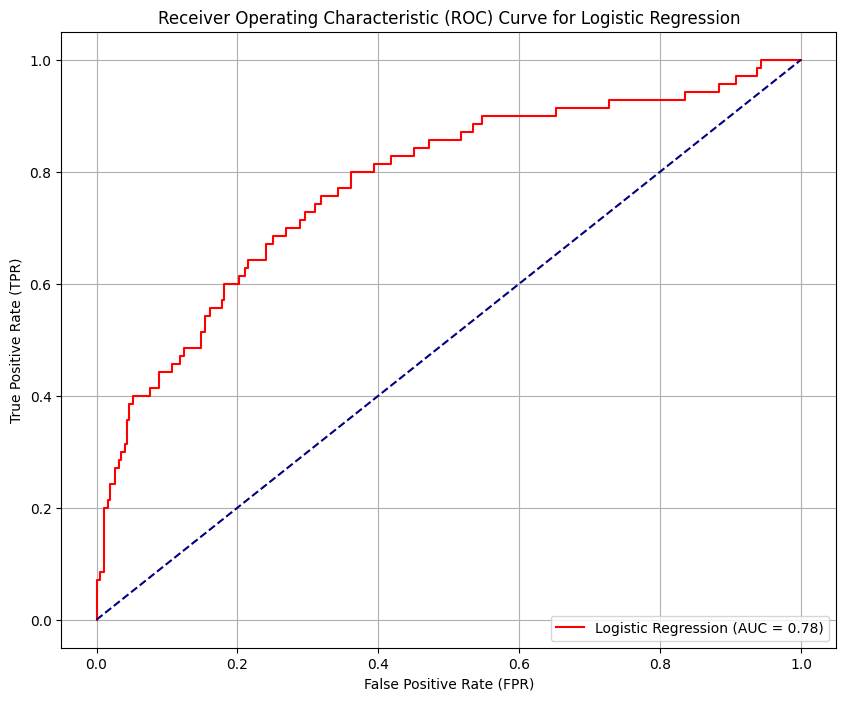

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- 1. Data Preparation and Setup for Logistic Regression ---
df = pd.read_csv('HR-Employee-Attrition.csv')

# Encode all 'object' type columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df.loc[:, col] = le.fit_transform(df[col])

# Define X and y
X = df.drop(columns=['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'])
y = df['Attrition'].astype(int)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Feature Scaling
scaler = StandardScaler()
# Fit on train and transform test data
X_test_scaled = scaler.fit(X_train).transform(X_test)

# --- 2. Train Logistic Regression Model ---
log_reg = LogisticRegression(solver='liblinear', max_iter=200, random_state=101)
log_reg.fit(scaler.transform(X_train), y_train)

# --- 3. Calculate ROC Metrics ---
# Get probability of the positive class (1: Attrition)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR, TPR, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# --- 4. Plot ROC Curve ---
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('logistic_regression_roc_curve.png')
plt.show()

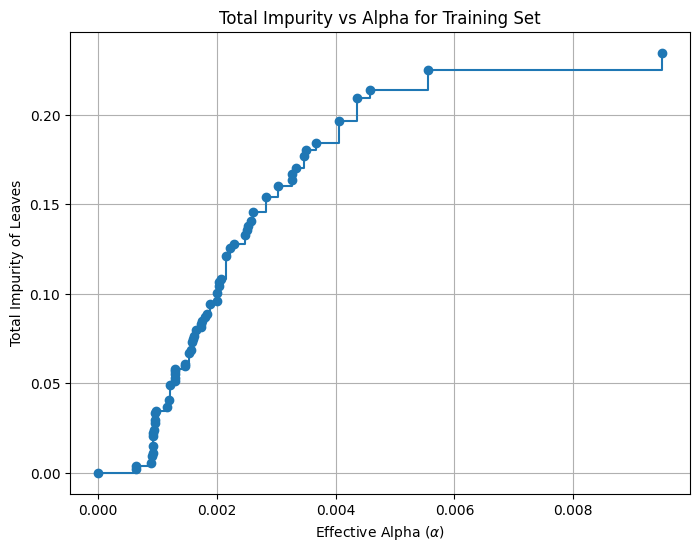

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# --- 1. Data Preparation and Training Setup ---
df = pd.read_csv('HR-Employee-Attrition.csv')

# Encode all 'object' type columns (Necessary setup)
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df.loc[:, col] = le.fit_transform(df[col])

# Define X and y
X = df.drop(columns=['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'])
# FIX: Explicitly ensure y is an integer type (astype(int))
y = df['Attrition'].astype(int)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# --- 2. Train the Initial (Unpruned) Decision Tree ---
# clf is the initial, overfitted model
clf = DecisionTreeClassifier(random_state=101)
# FIT will now succeed because y_train is explicitly integer
clf.fit(X_train, y_train)

# --- 3. Calculate and Plot Cost Complexity Pruning Path (CCP) ---
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Plotting Alpha vs Impurity
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha ($\\alpha$)")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Alpha for Training Set")
plt.grid(True)
plt.savefig('alpha_vs_impurity_fixed.png')
plt.show()

In [62]:
clf_initial = DecisionTreeClassifier(random_state=42)
clf_initial.fit(X_train, y_train)
path = clf_initial.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

pruned_model = DecisionTreeClassifier(ccp_alpha=ccp_alphas[10], random_state=42)
pruned_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred_dt = pruned_model.predict(X_test)
print(f"Pruned DT Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")


Pruned DT Accuracy: 0.7868


In [64]:


# Calculate Pruning Path to find Optimal Alpha
clf_initial = DecisionTreeClassifier(random_state=101)
clf_initial.fit(X_train, y_train)
path = clf_initial.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

# Find Optimal Alpha by testing models
test_scores = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=101, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    test_scores.append(clf_temp.score(X_test, y_test))

optimal_alpha_index = np.argmax(test_scores)
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]

# Train the Final Pruned Decision Tree Model
pruned_dt_model = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, random_state=101)
pruned_dt_model.fit(X_train, y_train)

# --- (Evaluation) ---
print(f"Optimal CCP Alpha: {optimal_ccp_alpha:.6f}")
print(f"Pruned DT Training Accuracy: {pruned_dt_model.score(X_train, y_train):.4f}")
print(f"Pruned DT Test Accuracy: {pruned_dt_model.score(X_test, y_test):.4f}")

Optimal CCP Alpha: 0.003493
Pruned DT Training Accuracy: 0.8853
Pruned DT Test Accuracy: 0.8481
